# Reading in and sampling from an audio file in python
- install audioread using pip installer in the command terminal (windows) or the terminal (Mac), you can also directly using the command below in Jupyter Lab or Notebook

In [6]:
!pip install audioread
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 348.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.3 MB/s eta 0:00:00a 0:00:010m


### Import the needed library

import sounddevice as sd
import soundfile as sf

filename = 'myfile.wav'
# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()

In [2]:
import audioread
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import io
import simpleaudio

int16


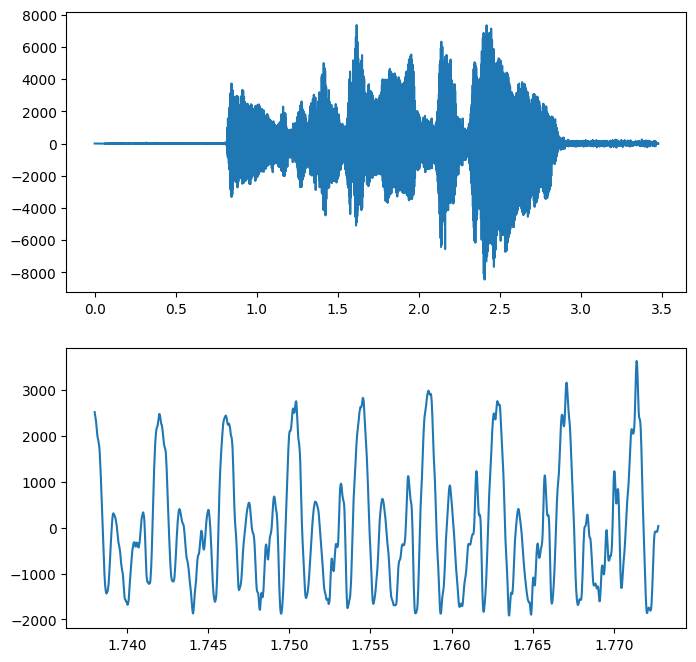

In [13]:
filename = 'AILearning.m4a'

temp = bytearray()

with audioread.audio_open(filename) as f:
    samplerate = f.samplerate
    channels = f.channels
    duration = f.duration
    
    for chunk in f.read_data():
        temp.extend(chunk)
        
sig = np.frombuffer(temp,dtype='<i2').reshape(-1,channels)

t = np.linspace(0,len(sig),num=len(sig))
t = t/samplerate

fig, axes = plt.subplots(2,1,figsize=(8,8))
axes[0].plot(t,sig)
axes[1].plot(t[int(0.5*len(sig)):int(0.51*len(sig))],sig[int(0.5*len(sig)):int(0.51*len(sig))])

## Playing the audio in python

In [5]:
#Generate a wave file in memory
import scipy.io.wavfile
import io
memory_file = 'myfile.wav'#io.BytesIO() #Buffer to write to
scipy.io.wavfile.write(memory_file, samplerate, sig) 

#Play the wave file
# !pip install simpleaudio
import simpleaudio


# playsound('myfile.wav')
# wave_obj = simpleaudio.WaveObject.from_wave_file(memory_file)
# play_obj = wave_obj.play()
# play_obj.wait_done()

In [6]:
playsound('myfile.wav')

## Downsampling the audio to 12,000 Hz
- In this instance I used numpy slicing [start:stop:step]

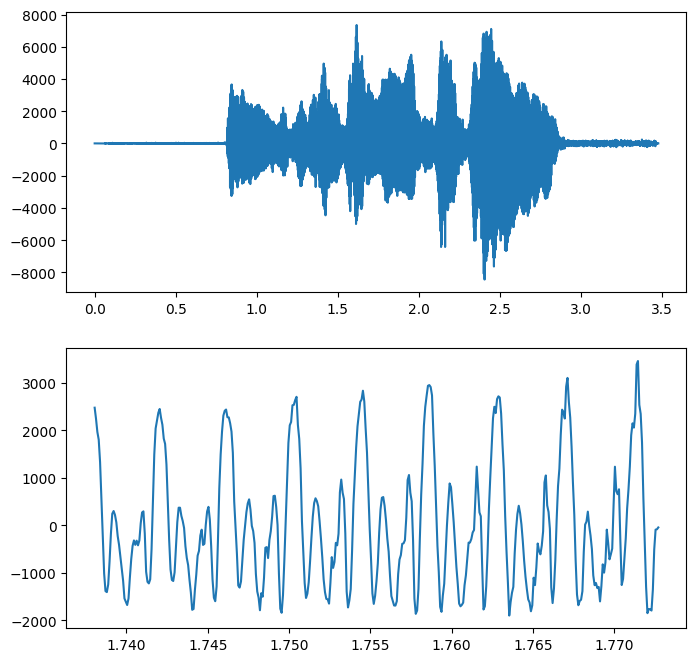

In [8]:
downsampled_sig = sig[1::4]
fs = samplerate/4

t = np.linspace(0,len(sig),num=len(downsampled_sig))
t = t/samplerate
fig, axes = plt.subplots(2,1,figsize=(8,8))
axes[0].plot(t,downsampled_sig)
axes[1].plot(t[int(0.5*len(downsampled_sig)):int(0.51*len(downsampled_sig))],downsampled_sig[int(0.5*len(downsampled_sig)):int(0.51*len(downsampled_sig))])


## Downsampling to 3000 Hz

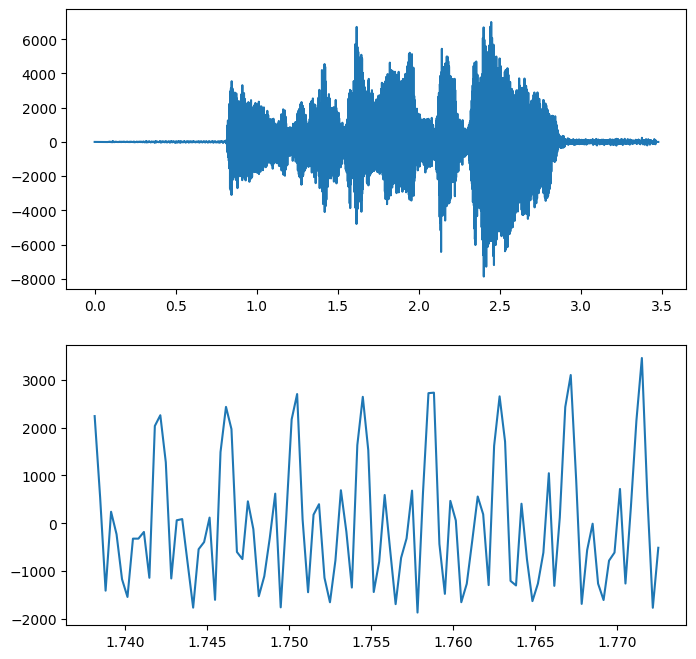

In [14]:
downsampled_sig = downsampled_sig[1::4]
fs = samplerate/16

t = np.linspace(0,len(sig),num=len(downsampled_sig))
t = t/samplerate
fig, axes = plt.subplots(2,1,figsize=(8,8))
axes[0].plot(t,downsampled_sig)
axes[1].plot(t[int(0.5*len(downsampled_sig)):int(0.51*len(downsampled_sig))],downsampled_sig[int(0.5*len(downsampled_sig)):int(0.51*len(downsampled_sig))])

### Quantization in Python
- Unfortunately there is not a concrete method outside of tensorflow for performing quantization, and tensorflow can be a pain to get set up so I am going to leave this as a reference although I am happy to help people get tensorflow set up if it is helpful. 

https://www.tensorflow.org/api_docs/python/tf/quantization/quantize